In [1]:
import pandas as pd
import json
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm as smgb
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
df = pd.read_csv('joint_data.csv', low_memory=False)
df.tail()

,id,user_id,user_condition,NEU,LAN,HAN,LAP,HAP,survey_sad,survey_angry,...,emo_nervous,emo_satisfied,emo_calm,emo_relaxed,emo_tired,emo_fearful,emo_aroused,emo_excited,emo_bored,emo_angry
12073,1826156311760748753,970D4EEC947843748CC850F6B6549E96,I_T,0,0,1,0,0,28.0,NaN,...,1,2,1,1,2,2,3,2,2,3
12074,1826590217886953644,970D4EEC947843748CC850F6B6549E96,I_T,0,0,1,0,0,NaN,13.0,...,1,2,1,1,2,2,3,2,2,3
12075,1826396363422408995,970D4EEC947843748CC850F6B6549E96,I_T,0,0,0,0,1,26.0,NaN,...,1,2,1,1,2,2,3,2,2,3
12076,1826888306262426013,777BB7E5A73F452EAD8F67E76D24AAD7,I_C,0,0,0,0,1,NaN,24.0,...,3,3,2,2,2,2,3,3,2,3
12077,1826786088867786994,970D4EEC947843748CC850F6B6549E96,I_T,0,0,1,0,0,NaN,7.0,...,1,2,1,1,2,2,3,2,2,3


In [4]:
df.describe()

,id,NEU,LAN,HAN,LAP,HAP,survey_sad,survey_angry,survey_calm,survey_excited,...,emo_nervous,emo_satisfied,emo_calm,emo_relaxed,emo_tired,emo_fearful,emo_aroused,emo_excited,emo_bored,emo_angry
count,1.207800e+04,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,6334.000000,6445.000000,6492.000000,6373.000000,...,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000
mean,1.817168e+18,0.028813,0.030800,0.688939,0.048270,0.225534,19.970161,19.343988,59.080099,31.126628,...,2.005133,2.698708,3.074847,2.972346,2.182563,1.982116,1.806425,2.439477,2.078407,2.335734
std,3.406523e+15,0.167287,0.172782,0.462947,0.214344,0.417951,24.319214,24.226464,27.891288,28.989772,...,1.039092,1.067662,1.083281,1.124109,1.056272,1.044039,0.985925,1.054814,0.986820,0.997953
min,1.808642e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.814433e+18,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,40.000000,5.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,1.816671e+18,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,8.000000,59.000000,25.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,1.819792e+18,0.000000,0.000000,1.000000,0.000000,0.000000,26.000000,25.000000,78.000000,50.000000,...,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
max,1.826888e+18,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12078 entries, 0 to 12077
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12078 non-null  int64  
 1   user_id                12078 non-null  object 
 2   user_condition         12078 non-null  object 
 3   NEU                    12078 non-null  int64  
 4   LAN                    12078 non-null  int64  
 5   HAN                    12078 non-null  int64  
 6   LAP                    12078 non-null  int64  
 7   HAP                    12078 non-null  int64  
 8   survey_sad             6334 non-null   float64
 9   survey_angry           6445 non-null   float64
 10  survey_calm            6492 non-null   float64
 11  survey_excited         6373 non-null   float64
 12  detected_nervous       12078 non-null  int64  
 13  detected_sad           12078 non-null  int64  
 14  detected_happy         12078 non-null  int64  
 15  de

In [9]:
df[['detected_angry','emo_angry', 'survey_angry']].corr()

,detected_angry,emo_angry,survey_angry
detected_angry,1.000000,0.006273,0.107152
emo_angry,0.006273,1.000000,0.284019
survey_angry,0.107152,0.284019,1.000000


In [13]:
df[['detected_sad','emo_sad', 'survey_sad']].corr()

,detected_sad,emo_sad,survey_sad
detected_sad,1.000000,-0.010455,0.054159
emo_sad,-0.010455,1.000000,0.278934
survey_sad,0.054159,0.278934,1.000000


In [14]:
df[['detected_calm','emo_calm', 'survey_calm']].corr()

,detected_calm,emo_calm,survey_calm
detected_calm,1.000000,0.004475,0.011689
emo_calm,0.004475,1.000000,0.311733
survey_calm,0.011689,0.311733,1.000000


In [15]:
df[['detected_excited','emo_excited', 'survey_excited']].corr()

,detected_excited,emo_excited,survey_excited
detected_excited,1.000000,0.035021,0.074010
emo_excited,0.035021,1.000000,0.360059
survey_excited,0.074010,0.360059,1.000000


<Axes: >

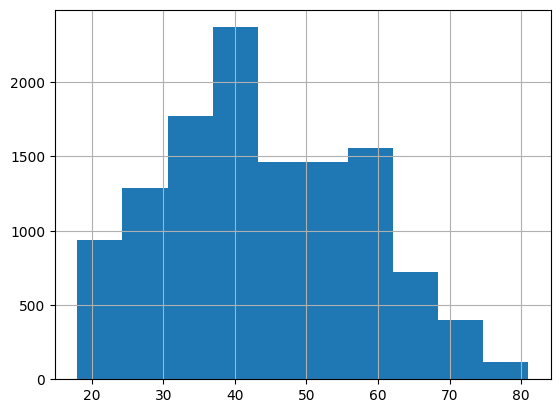

In [20]:
df['age'].hist()

In [25]:
df['ladder'].value_counts()

5                2613
6                2090
4                1956
3                1911
7                1795
2                 732
8                 628
9                 178
Bottom Rung 1     150
Top Rung 10        25
Name: ladder, dtype: int64

In [26]:
df.ladder[df.ladder == 'Bottom Rung 1'] = 1

/var/folders/dv/z4cwzdzn42jbcsx_gqgbvp400000gn/T/ipykernel_46283/334600236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ladder[df.ladder == 'Bottom Rung 1'] = 1


In [28]:
df.ladder[df.ladder == 'Top Rung 10'] = 10

/var/folders/dv/z4cwzdzn42jbcsx_gqgbvp400000gn/T/ipykernel_46283/789695446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ladder[df.ladder == 'Top Rung 10'] = 10


In [29]:
df['ladder'].value_counts()

5     2613
6     2090
4     1956
3     1911
7     1795
2      732
8      628
9      178
1      150
10      25
Name: ladder, dtype: int64

In [31]:
df['ladder'] = df['ladder'].astype('int64')

<Axes: >

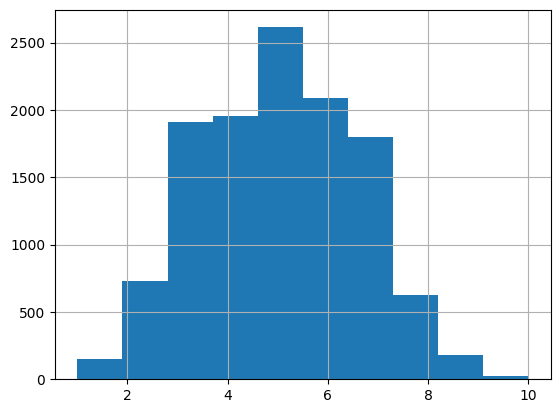

In [43]:
df['ladder'].hist()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12078 entries, 0 to 12077
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12078 non-null  int64  
 1   user_id                12078 non-null  object 
 2   user_condition         12078 non-null  object 
 3   NEU                    12078 non-null  int64  
 4   LAN                    12078 non-null  int64  
 5   HAN                    12078 non-null  int64  
 6   LAP                    12078 non-null  int64  
 7   HAP                    12078 non-null  int64  
 8   survey_sad             6334 non-null   float64
 9   survey_angry           6445 non-null   float64
 10  survey_calm            6492 non-null   float64
 11  survey_excited         6373 non-null   float64
 12  detected_nervous       12078 non-null  int64  
 13  detected_sad           12078 non-null  int64  
 14  detected_happy         12078 non-null  int64  
 15  de

<Axes: >

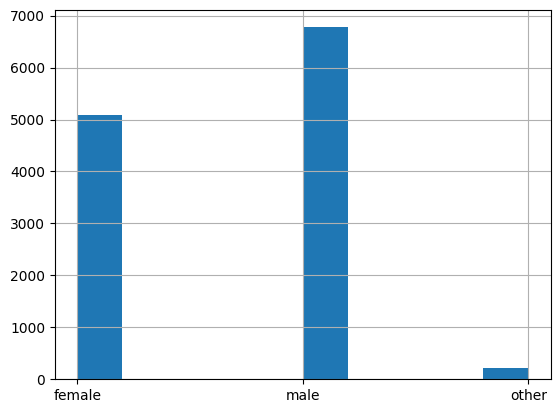

In [33]:
df['gender'].hist()

In [34]:
df['gender'].value_counts()

male      6776
female    5080
other      222
Name: gender, dtype: int64

In [36]:
df['binary_female'] = 0
df.binary_female[df.gender == 'female'] = 1

/var/folders/dv/z4cwzdzn42jbcsx_gqgbvp400000gn/T/ipykernel_46283/2263318100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.binary_female[df.gender == 'female'] = 1


In [38]:
df['binary_female'].value_counts()

0    6998
1    5080
Name: binary_female, dtype: int64

In [39]:
df[['detected_angry','emo_angry', 'survey_angry', 'age', 'binary_female']].corr()

,detected_angry,emo_angry,survey_angry,age,binary_female
detected_angry,1.000000,0.006273,0.107152,0.030149,-0.025246
emo_angry,0.006273,1.000000,0.284019,-0.038819,-0.029669
survey_angry,0.107152,0.284019,1.000000,0.040420,-0.061804
age,0.030149,-0.038819,0.040420,1.000000,0.083725
binary_female,-0.025246,-0.029669,-0.061804,0.083725,1.000000


array([[<Axes: title={'center': 'emo_angry'}>,
        <Axes: title={'center': 'detected_angry'}>],
       [<Axes: title={'center': 'survey_angry'}>, <Axes: >]], dtype=object)

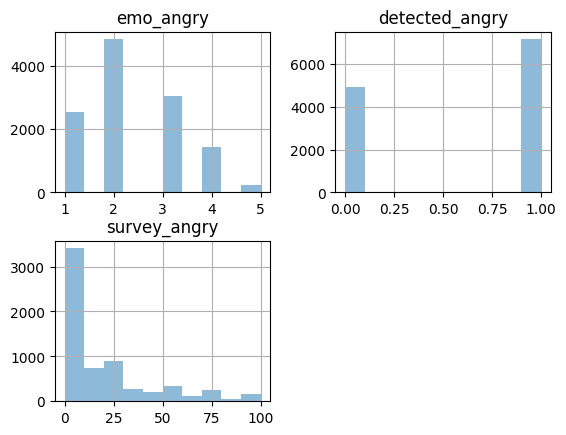

In [52]:
df[['emo_angry', 'detected_angry', 'survey_angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'emo_excited'}>,
        <Axes: title={'center': 'detected_excited'}>],
       [<Axes: title={'center': 'survey_excited'}>, <Axes: >]],
      dtype=object)

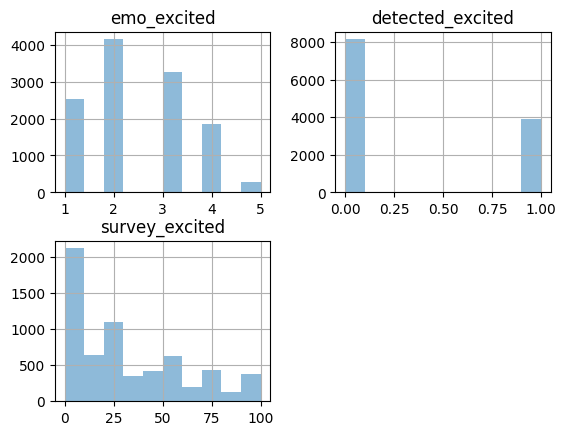

In [53]:
df[['emo_excited', 'detected_excited', 'survey_excited']].hist(alpha=0.5)

In [69]:
df[['survey_angry', 
'detected_angry',
'emo_enthusiastic', 
'emo_happy', 
'emo_still', 
'emo_lonely',
'emo_sad',
'emo_nervous',
'emo_satisfied',
'emo_calm',
'emo_relaxed',
'emo_tired',
'emo_fearful',
'emo_aroused',
'emo_excited',
'emo_bored',
'emo_angry']].corr()

,survey_angry,detected_angry,emo_enthusiastic,emo_happy,emo_still,emo_lonely,emo_sad,emo_nervous,emo_satisfied,emo_calm,emo_relaxed,emo_tired,emo_fearful,emo_aroused,emo_excited,emo_bored,emo_angry
survey_angry,1.000000,0.107152,-0.088852,-0.179375,-0.129281,0.133425,0.225787,0.201223,-0.137253,-0.210245,-0.222037,0.163466,0.248558,0.037875,-0.064946,0.047777,0.284019
detected_angry,0.107152,1.000000,-0.014582,-0.038358,0.003238,-0.017183,0.024336,-0.002712,-0.033545,-0.008003,-0.017712,0.010997,0.030331,-0.004642,-0.034187,-0.007158,0.006273
emo_enthusiastic,-0.088852,-0.014582,1.000000,0.603162,0.108019,-0.023658,-0.110640,-0.021472,0.559979,0.346570,0.375201,-0.080441,-0.007983,0.276959,0.707596,-0.204465,-0.123650
emo_happy,-0.179375,-0.038358,0.603162,1.000000,0.181272,-0.134112,-0.265387,-0.189248,0.672080,0.526887,0.550322,-0.196649,-0.215496,0.167855,0.578346,-0.158404,-0.321161
emo_still,-0.129281,0.003238,0.108019,0.181272,1.000000,0.147697,-0.057880,-0.083407,0.187338,0.390425,0.362065,0.065571,-0.099372,0.100110,0.092847,0.122538,-0.067663
emo_lonely,0.133425,-0.017183,-0.023658,-0.134112,0.147697,1.000000,0.337199,0.344303,-0.080095,-0.095111,-0.078506,0.441650,0.292977,0.216498,0.076775,0.336516,0.255195
emo_sad,0.225787,0.024336,-0.110640,-0.265387,-0.057880,0.337199,1.000000,0.558838,-0.230779,-0.279996,-0.321714,0.430387,0.550075,0.077980,-0.042178,0.191205,0.556352
emo_nervous,0.201223,-0.002712,-0.021472,-0.189248,-0.083407,0.344303,0.558838,1.000000,-0.168778,-0.334601,-0.389626,0.470807,0.705639,0.114933,0.047726,0.139549,0.500357
emo_satisfied,-0.137253,-0.033545,0.559979,0.672080,0.187338,-0.080095,-0.230779,-0.168778,1.000000,0.455353,0.493042,-0.202254,-0.168183,0.187968,0.546011,-0.218063,-0.256398
emo_calm,-0.210245,-0.008003,0.346570,0.526887,0.390425,-0.095111,-0.279996,-0.334601,0.455353,1.000000,0.710843,-0.163546,-0.308504,0.023568,0.265706,-0.027333,-0.375115


In [77]:
# Z-Score using pandas 
# https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
df['var_age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['var_age'].describe()

count    1.207800e+04
mean    -4.706360e-17
std      1.000000e+00
min     -1.876512e+00
25%     -7.902249e-01
50%     -1.384526e-01
75%      8.029963e-01
max      2.685894e+00
Name: var_age, dtype: float64

In [80]:
# shift ladder to have a mean 0
df['var_ladder'] = (df['ladder'] - df['ladder'].mean())
df['var_ladder'].describe()

count    1.207800e+04
mean     2.635562e-16
std      1.749875e+00
min     -3.985676e+00
25%     -9.856764e-01
50%      1.432356e-02
75%      1.014324e+00
max      5.014324e+00
Name: var_ladder, dtype: float64

In [83]:
df['var_emo_angry'] = (df['emo_angry'] - df['emo_angry'].mean()) / df['emo_angry'].std()
df['var_emo_sad'] = (df['emo_sad'] - df['emo_sad'].mean()) / df['emo_sad'].std()
df['var_emo_excited'] = (df['emo_excited'] - df['emo_excited'].mean()) / df['emo_excited'].std()
df['var_emo_calm'] = (df['emo_calm'] - df['emo_calm'].mean()) / df['emo_calm'].std()

In [89]:
md = smf.mixedlm("survey_angry ~ var_age + binary_female + var_ladder + var_emo_angry + var_emo_excited + detected_angry", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: survey_angry
No. Observations:  6445    Method:             REML        
No. Groups:        1105    Scale:              335.6639    
Min. group size:   1       Log-Likelihood:     -28559.0334 
Max. group size:   40      Converged:          Yes         
Mean group size:   5.8                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        17.902    0.764 23.423 0.000 16.404 19.399
var_age           1.013    0.503  2.015 0.044  0.028  1.999
binary_female    -2.718    1.019 -2.668 0.008 -4.714 -0.721
var_ladder       -0.553    0.299 -1.850 0.064 -1.139  0.033
var_emo_angry     5.548    0.503 11.027 0.000  4.562  6.534
var_emo_excited   0.310    0.517  0.600 0.549 -0.703  1.323
detected_angry    3.848    0.547  7.039 0.000  2.77

In [90]:
md = smf.mixedlm("survey_sad ~ var_age + binary_female + var_ladder + var_emo_angry + var_emo_excited + detected_sad", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: survey_sad 
No. Observations:   6334    Method:             REML       
No. Groups:         1101    Scale:              350.5435   
Min. group size:    1       Log-Likelihood:     -28238.3304
Max. group size:    38      Converged:          Yes        
Mean group size:    5.8                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        19.918    0.740 26.914 0.000 18.467 21.368
var_age          -0.629    0.529 -1.191 0.234 -1.665  0.407
binary_female    -0.956    1.069 -0.894 0.371 -3.052  1.140
var_ladder       -1.252    0.316 -3.966 0.000 -1.870 -0.633
var_emo_angry     3.687    0.529  6.968 0.000  2.650  4.725
var_emo_excited  -0.779    0.542 -1.437 0.151 -1.842  0.284
detected_sad      2.428    0.585  4.152 0.000  1.28

In [92]:
md = smf.mixedlm("survey_excited ~ var_age + binary_female + var_ladder + var_emo_angry + var_emo_excited + detected_excited", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: survey_excited
No. Observations: 6373    Method:             REML          
No. Groups:       1103    Scale:              403.7877      
Min. group size:  1       Log-Likelihood:     -28948.0081   
Max. group size:  36      Converged:          Yes           
Mean group size:  5.8                                       
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         31.131    0.876 35.527 0.000 29.413 32.848
var_age            0.717    0.619  1.158 0.247 -0.496  1.930
binary_female     -0.816    1.252 -0.651 0.515 -3.269  1.638
var_ladder         2.674    0.368  7.267 0.000  1.953  3.396
var_emo_angry     -1.426    0.615 -2.319 0.020 -2.631 -0.221
var_emo_excited   10.148    0.635 15.977 0.000  8.903 11.393
detected_excited   2.882    0.598  4

In [91]:
md = smf.mixedlm("survey_calm ~ var_age + binary_female + var_ladder + var_emo_angry + var_emo_excited+ detected_calm", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: survey_calm
No. Observations:   6492    Method:             REML       
No. Groups:         1096    Scale:              414.5438   
Min. group size:    1       Log-Likelihood:     -29543.4131
Max. group size:    41      Converged:          Yes        
Mean group size:    5.9                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        59.692    0.844 70.723 0.000 58.038 61.346
var_age           2.158    0.610  3.539 0.000  0.963  3.354
binary_female    -1.577    1.238 -1.274 0.203 -4.004  0.850
var_ladder        1.552    0.365  4.253 0.000  0.837  2.266
var_emo_angry    -5.075    0.614 -8.268 0.000 -6.279 -3.872
var_emo_excited   2.256    0.626  3.606 0.000  1.030  3.482
detected_calm    -0.335    2.222 -0.151 0.880 -4.69